In [31]:
import numpy as np
import matplotlib.pyplot as plt
from polyFit import *
%matplotlib inline
from gaussPivot import *

# Problem 9

In [6]:
def f(x, c):
    sum = 0
    for i in range(len(c)):
        sum += c[i] * x**i
    return sum

Linear standard deviation: 2.2435638279603114
Quadratic standard deviation: 0.8129279610540698


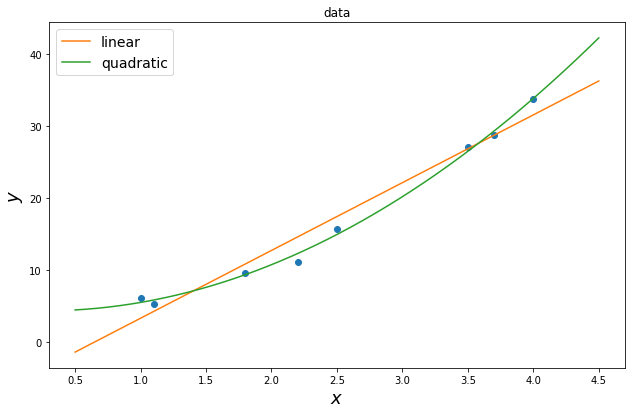

In [10]:
xData = np.array([1.0, 2.5, 3.5, 4.0, 1.1, 1.8, 2.2, 3.7])
yData = np.array([6.008, 15.722, 27.130, 33.772, 5.257, 9.549, 11.098, 28.828])

x = np.linspace(0.5, 4.5, 5000)
c1 = polyFit(xData, yData, 1)
y1 = f(x, c1)
c2 = polyFit(xData, yData, 2)
y2 = f(x, c2)

sigma1 = stdDev(c1, xData, yData)
sigma2 = stdDev(c2, xData, yData)

print("Linear standard deviation:", sigma1)
print("Quadratic standard deviation:", sigma2)
fig = plt.figure(figsize=(10,6))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.set_xlabel(r"$x$",fontsize=18)
axes.set_ylabel(r"$y$",fontsize=18)
axes.set_title('data')
axes.plot(xData, yData, "o")
axes.plot(x, y1, label="linear")
axes.plot(x, y2, label="quadratic")
axes.legend(loc=2,fontsize=14)

# Problem 13

In [15]:
def f0(x):
    return np.sin((np.pi * x)/2)

def f1(x):
    return np.cos((np.pi * x)/2)

In [27]:
def A(j, k, xData, f):
    sum = 0
    for i in range(len(xData)):
        sum += f[j](xData[i]) * f[k](xData[i])
    return sum

In [28]:
def b(k, xData, yData, f):
    sum = 0
    for i in range(len(xData)):
        sum += f[k](xData[i]) * yData[i]
    return sum

[ 3.03849053 -2.04955966]


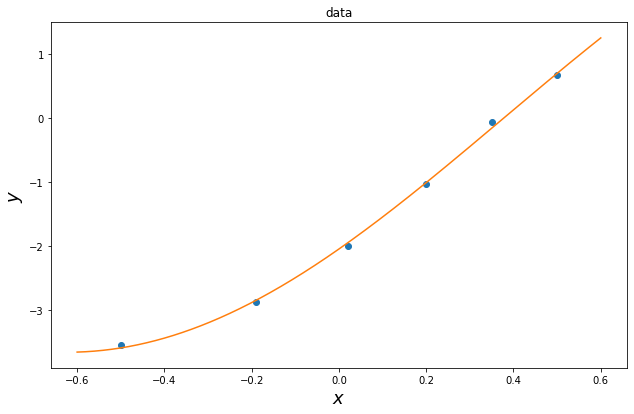

In [35]:
xData = np.array([-0.5, -0.19, 0.02, 0.20, 0.35, 0.50])
yData = np.array([-3.558, -2.874, -1.995, -1.040, -0.068, 0.677])

f = [f0, f1]
matrixA = np.zeros((2, 2))
matrixb = np.zeros(2)
matrixA[0, 0] = A(0, 0, xData, f)
matrixA[0, 1] = A(0, 1, xData, f)
matrixA[1, 0] = A(1, 0, xData, f)
matrixA[1, 1] = A(1, 1, xData, f)
matrixb[0] = b(0, xData, yData, f)
matrixb[1] = b(1, xData, yData, f)
coef = gaussPivot(matrixA, matrixb)
print(coef)

x = np.linspace(-0.6, 0.6, 5000)
y = coef[0]*f0(x) + coef[1]*f1(x)
fig = plt.figure(figsize=(10,6))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.set_xlabel(r"$x$",fontsize=18)
axes.set_ylabel(r"$y$",fontsize=18)
axes.set_title('data')
axes.plot(xData, yData, "o")
axes.plot(x, y)